In [1]:
import os
import numpy as np
from tensorflow import keras
import tensorflow as tf
import librosa
from matplotlib import pyplot
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
import sys

def get_metadata(file_name):
    if file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '01':
        emo = 'neutral'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '02':
        emo = 'calm'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '03':
        emo = 'happy'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '04':
        emo = 'sad'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '05':
        emo = 'angry'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '06':
        emo = 'fearful'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '07':
        emo = 'disgust'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '08':
        emo = 'surprised'
        
    if int(file_name[-len('03-01-06-02-02-01-07.wav'):][18:20]) % 2 == 0:  # Gender
        gen = 'female'
    else:
        gen = 'male'
        # 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 
        # 05 = angry, 06 = fearful, 07 = disgust, 
        # 08 = surprised
    return emo, gen


fn = []
for dirname, _, filenames in os.walk('/mount/Project/Project Files/Data/Audio/Audio Speech Sentiment/'):
    for filename in filenames:
        fn.append(os.path.join(dirname, filename))
        

2023-07-23 20:56:57.599113: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 20:57:18.708202: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Text(0.5, 1.0, 'Waveform')

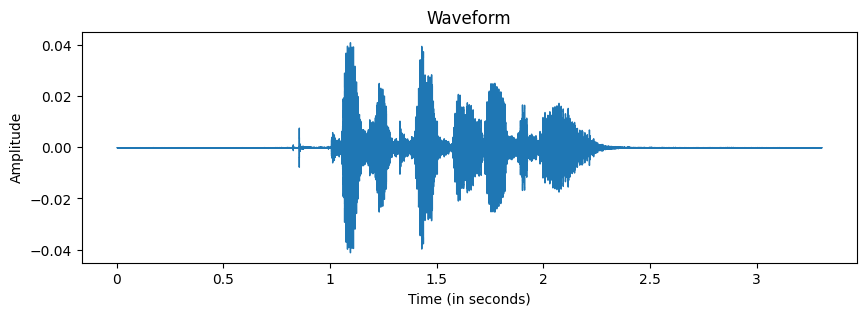

In [6]:
import librosa
import matplotlib.pyplot as plt
file=fn[0]
signal, sample_rate = librosa.load(file, sr=22050)
plt.figure(figsize=(10,3))
librosa.display.waveshow(signal, sr=sample_rate, 
                         # alpha=0.4
                        )
plt.xlabel("Time (in seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [7]:
import IPython.display as ipd
ipd.Audio(file)

Text(0.5, 1.0, 'Short Term Fourier Transformation-STFT')

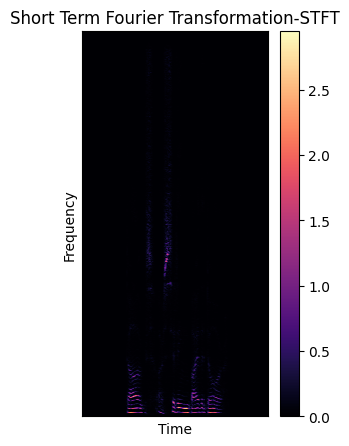

In [9]:
import numpy as np
import librosa
import librosa, librosa.display
import matplotlib.pyplot as plt
file=fn[10]
signal, sample_rate = librosa.load(file, sr=22050)
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)
# display spectrogram
plt.figure(figsize=(3,5))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Short Term Fourier Transformation-STFT")

Text(0.5, 1.0, 'Power spectrum')

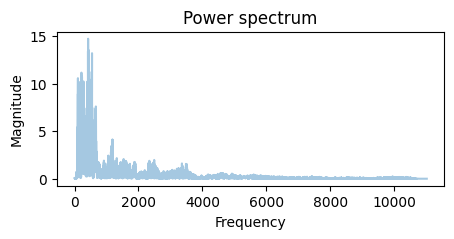

In [10]:
import numpy as np
import librosa
import librosa, librosa.display
import matplotlib.pyplot as plt
file=fn[0]
signal, sample_rate = librosa.load(file, sr=22050)
# FFT(Fast Fourier Transformation) -> power spectrum
fft = np.fft.fft(signal)
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)
# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))
# take half of the spectrum and frequency as it is a mirror image
half_spectrum = spectrum[:int(len(spectrum)/2)]
half_f = f[:int(len(spectrum)/2)]
# plot spectrum
plt.figure(figsize=(5,2))
plt.plot(half_f, half_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

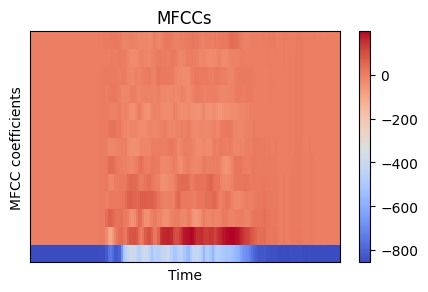

In [13]:
import numpy as np
import librosa
import librosa, librosa.display
import matplotlib.pyplot as plt
file=fn[0]
signal, sample_rate = librosa.load(file, sr=22050)
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, 
                             n_fft=n_fft, 
                             hop_length=hop_length, n_mfcc=13)
# display MFCCs
plt.figure(figsize=(5,3))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
# show the plot
plt.show()

In [14]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from scipy import signal
import numpy as np
import librosa
import librosa.display
import wave
import random as rn
import tensorflow as tf
from keras.utils import to_categorical
import seaborn as sns
%matplotlib inline

In [51]:
def get_feature(file):
    audio, sample_rate = librosa.load(file, 
                                      # res_type='kaiser_fast'
                                     ) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [56]:
# Extract MFCC features
mfcc_features = get_feature(fn[0])

len(mfcc_features)

40

In [57]:
type(mfcc_features)

numpy.ndarray

In [ ]:
# Display the MFCC features
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_features, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()

In [ ]:
from tqdm import tqdm

# Initialize empty lists
male_features = []
male_labels = []
female_features = []
female_labels = []

# Use tqdm to track progress
for curr_file in tqdm(fn, desc="Processing files", 
                      unit="file"):
    curr_feat = get_feature(curr_file)
    curr_meta = get_metadata(curr_file)
    if curr_meta[1] == 'male':
        male_features.append(curr_feat)
        male_labels.append(curr_meta[0])
    # else:
    #     # female_features.append(curr_feat)
    #     # female_labels.append(curr_meta[0])
    #     continue

In [28]:



def preprocess_mfcc_features(mfcc_features_list):
    """
    Preprocesses a list of MFCC features for 2D CNN input.

    Parameters:
        mfcc_features_list (list): List of MFCC feature arrays, each with shape (n_mfcc, time_steps).

    Returns:
        preprocessed_features (np.ndarray): Preprocessed and padded MFCC features ready for 2D CNN input.
    """
    # Find the maximum number of time steps among all audio files
    max_time_steps = max(mfcc.shape[1] for mfcc in mfcc_features_list)

    preprocessed_features = []
    for mfcc in mfcc_features_list:
        # Pad each MFCC feature to have the same number of time steps as the maximum
        padded_mfcc = np.pad(mfcc, ((0, 0), (0, max_time_steps - mfcc.shape[1])), mode='constant')
        preprocessed_features.append(padded_mfcc)

    # Normalize each audio file independently
    preprocessed_features = [(feature - np.mean(feature)) / np.std(feature) for feature in preprocessed_features]

    # Combine all features into a single array
    preprocessed_features = np.stack(preprocessed_features)

    return preprocessed_features


In [30]:
male_features = preprocess_mfcc_features(male_features)

# Add channel dimension for 2D CNN input
male_features = preprocessed_features[:, np.newaxis, :, :]

In [31]:
# Normalize the MFCC features
male_features = (male_features - np.mean(male_features)) / np.std(male_features)

# Add channel dimension for 2D CNN input
male_features = male_features[np.newaxis, :, :, np.newaxis]

# Check the shape of the extracted MFCC features
print("MFCC Features Shape:", male_features.shape)

MFCC Features Shape: (1, 720, 1, 1, 1, 13, 228)


In [33]:
len(male_features[0])

720

In [34]:
len(male_features)

1

In [ ]:
# Define the list of possible values
possible_values = list(set(male_labels))

# Your list of strings to be encoded
# input_strings = ['happy', 'sad', 'angry', 'calm']

# Create a mapping from each value to its index
value_to_index = {value: index for index, value in enumerate(possible_values)}

# Map each string to its corresponding index
encoded_indices = [value_to_index[string] for string in male_labels]

# Perform one-hot encoding
one_hot_matrix = tf.one_hot(indices=encoded_indices, depth=len(possible_values))

# Convert the TensorFlow tensor to a NumPy array (optional)
male_labels_en = one_hot_matrix.numpy()

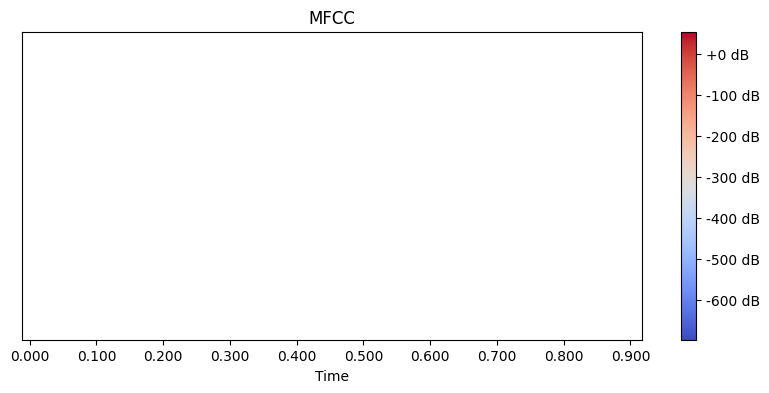

In [58]:
# Create time values for the x-axis (assuming 40 frames)
frame_length = len(mfcc_features)
frame_time = librosa.frames_to_time(range(frame_length), sr=sample_rate)

# Plot the MFCC features
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_features.reshape(1, -1), x_axis='time', sr=sample_rate, hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()

In [ ]:
# Create time values for the x-axis (assuming 40 frames)
frame_length = len(mfcc_features)
frame_time = librosa.frames_to_time(range(frame_length), sr=sample_rate)

# Plot the MFCC features
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_features.reshape(1, -1), x_axis='time', sr=sample_rate, hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()# Create time values for the x-axis (assuming 40 frames)
frame_length = len(mfcc_features)
frame_time = librosa.frames_to_time(range(frame_length), sr=sample_rate)

# Plot the MFCC features
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_features.reshape(1, -1), x_axis='time', sr=sample_rate, hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()

2023-07-23 21:32:13.913693: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-23 21:32:14.072683: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [40]:
len(male_labels_en[0])

8

In [59]:
import pandas as pd
import os
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
def get_feature(file_name):
    audio, sample_rate = librosa.load(file_name, 
                                      # res_type='kaiser_fast'
                                     ) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features


In [63]:
from tqdm import tqdm

# Initialize empty lists
male_features = []
male_labels = []
female_features = []
female_labels = []

# Use tqdm to track progress
for curr_file in tqdm(fn, desc="Processing files", 
                      unit="file"):
    curr_feat = get_feature(curr_file)
    curr_meta = get_metadata(curr_file)
    if curr_meta[1] == 'male':
        male_features.append(curr_feat)
        male_labels.append(curr_meta[0])
    else:
        female_features.append(curr_feat)
        female_labels.append(curr_meta[0])

Processing files:   0%|                                         | 0/1440 [00:00<?, ?file/s]


ModuleNotFoundError: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /mount/Project/Project Files/PythonEnvs/DataSciEnv2/lib/python3.10/site-packages/librosa/core/audio.py, line 32, in <module>

----> resampy = lazy.load("resampy")